In [1]:
import time
start_time=time.time()

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import sys
import os
from PIL import Image
import seaborn as sns
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

Brillo emisión

In [3]:
dist = 500000 #parsecs
pix = 0.26 #arcsec
pc = dist*(2*np.pi) / (360 * 60 * 60)
s0=(0.9*pc)/2.355
pc,s0

(2.42406840554768, 0.9263955689991135)

Text(0.5, 1.0, 'H$_{α}$ Flux')

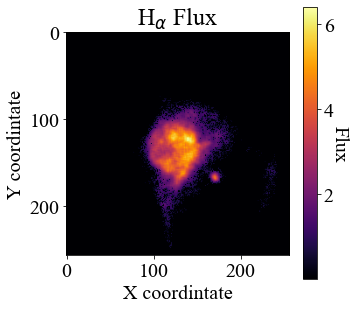

In [4]:
#ARCHIVO
FitsFile= 'Obs/TAURUS.HX.Ha.Peak'
hdul=fits.open(FitsFile + '.fits')
fig, ax = plt.subplots(figsize=(5, 5))
image_data=hdul[0].data
plt.imshow(image_data, cmap='inferno')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('Flux', rotation=270, labelpad=15)  
plt.title('H$_{α}$ Flux')

In [5]:
#TABLA DATOS
flx=hdul[0].data
df=pd.DataFrame(flx)
dffx=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'I'})
dffx.describe()

,Y,X,I
count,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,2.729583e-01
std,73.900834,73.900834,8.935073e-01
min,0.000000,0.000000,1.597935e-09
25%,63.750000,63.750000,1.597935e-09
50%,127.500000,127.500000,1.597935e-09
75%,191.250000,191.250000,1.597935e-09
max,255.000000,255.000000,6.391339e+00


Velocidad Radial

Text(0.5, 1.0, 'H$_{α}$ Radial Velocity')

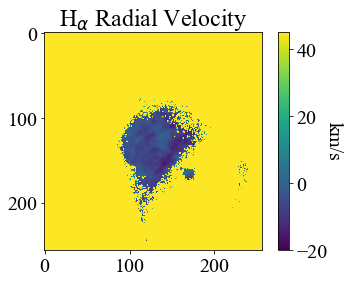

In [6]:
#ARCHIVO
FitsFile= FitsFile= 'Obs/TAURUS.HX.Ha.RV'
#FitsFile= 'n604halphasigma'
hdul=fits.open(FitsFile + '.fits')
#IMAGEN
image_data=hdul[0].data
plt.imshow(image_data, cmap='viridis')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.clim(-20,45) 
plt.title('H$_{α}$ Radial Velocity')


In [7]:
vel=hdul[0].data
df=pd.DataFrame(vel)

dfvr=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'RV'})
dfvr.describe()

,Y,X,RV
count,65536.000000,65536.000000,65536.000000
mean,127.500000,127.500000,245.435674
std,73.900834,73.900834,90.946922
min,0.000000,0.000000,-23.632812
25%,63.750000,63.750000,278.339996
50%,127.500000,127.500000,278.339996
75%,191.250000,191.250000,278.339996
max,255.000000,255.000000,278.339996


In [8]:
data=dfvr
data['I']=dffx.I
data.describe()

,Y,X,RV,I
count,65536.000000,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,245.435674,2.729583e-01
std,73.900834,73.900834,90.946922,8.935073e-01
min,0.000000,0.000000,-23.632812,1.597935e-09
25%,63.750000,63.750000,278.339996,1.597935e-09
50%,127.500000,127.500000,278.339996,1.597935e-09
75%,191.250000,191.250000,278.339996,1.597935e-09
max,255.000000,255.000000,278.339996,6.391339e+00


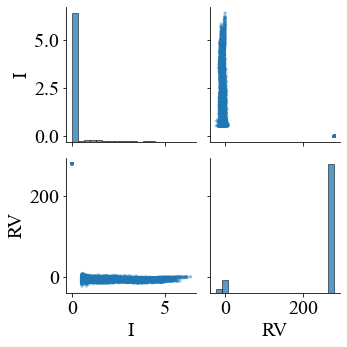

In [9]:
sns.pairplot(data, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

Ajuste de datos

In [10]:
mI=(data.I>data.I.mean()+0.5*data.I.std())&(data.X<190)
data=data[mI]

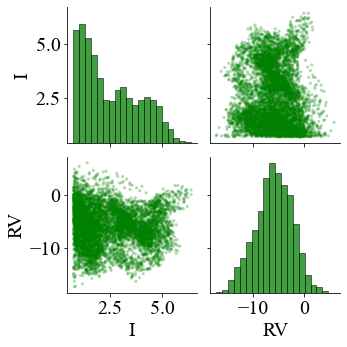

In [11]:
sns.pairplot(data, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none',color='green'),
             diag_kws=dict(bins=20, color="green"),
            )

#plt.savefig('TAURUS/'+reg+'CorrlHA.png')

In [12]:
data.describe()

,Y,X,RV,I
count,6925.000000,6925.000000,6925.000000,6925.000000
mean,136.477545,132.964043,-5.948209,2.521570
std,28.541834,22.922061,3.591347,1.364368
min,82.000000,85.000000,-17.226868,0.720783
25%,115.000000,115.000000,-8.254059,1.320395
50%,133.000000,131.000000,-5.865753,2.142590
75%,157.000000,150.000000,-3.388214,3.608605
max,244.000000,189.000000,5.964050,6.391339


In [13]:
data.sem()

Y     0.342983
X     0.275451
RV    0.043157
I     0.016395
dtype: float64

Text(0.5, 1.0, 'H$_{α}$ Flux')

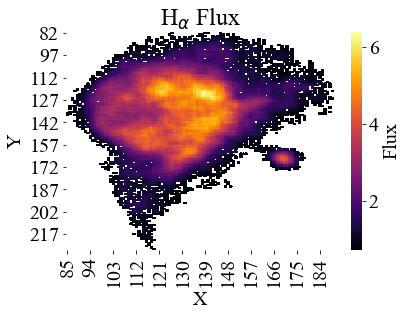

In [14]:
datal=data.copy()
#datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
#fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataH_f, cmap="inferno",xticklabels='auto',cbar_kws={'label': 'Flux'})
plt.title('H$_{α}$ Flux')
#plt.savefig('TAURUS/Imgs/A/'+reg+'FH.png')

Text(0.84, 0.14, '20 pc')

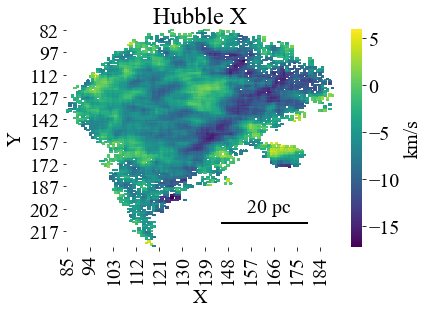

In [15]:
fig = plt.figure()
ax = fig.add_subplot()

datal=data.copy()

dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
sns.heatmap(dataH_rv, cmap="viridis",cbar_kws={'label': 'km/s'})

plt.title('Hubble X')

plt.axhline(y=130, xmin=0.58, xmax=0.90, linewidth=2, color = 'k')

ax.text(0.84, 0.14, '20 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
#plt.savefig('TAURUS/Imgs/A/'+reg+'RVH.png')

Text(0.5, 17.60000000000001, 'Radial velocity [km/s]')

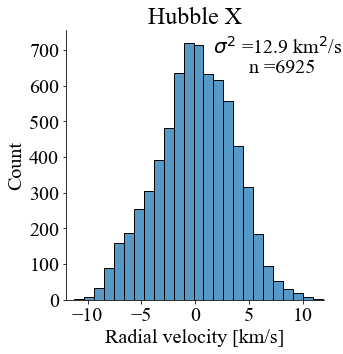

In [16]:
#fig, ax = plt.subplots()

sns.displot(data.RV-data.RV.mean(),bins=25)
plt.xlim(-12,12)


plt.text(0.85, 1.15,'n ='+str(data.RV.count()), ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.92, 0.88,'$μ$ ='+str(np.round(data.RV.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.85, 1.25,'$σ^{2}$ ='+str(np.round(data.RV.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('Hubble X')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="14"


plt.xlabel('Radial velocity [km/s]')

In [17]:
import pickle

f = open('VF\\HX.pkl',"wb")
pickle.dump(data,f)
f.close()

In [18]:
HX = {'HX' : data,
      'pc' : pc,
      's0' : s0
      }
HX

{'HX':          Y    X        RV         I
 21118   82  126  0.093781  0.811621
 21131   82  139 -0.977600  0.803479
 21132   82  140  0.093781  0.735497
 21137   82  145  3.062408  0.801960
 21373   83  125 -1.490967  0.836578
 ...    ...  ...       ...       ...
 57205  223  117 -4.013184  0.755925
 59765  233  117  4.245361  0.850257
 60532  236  116  3.999848  0.784342
 61558  240  118  2.727600  0.794715
 62583  244  119 -6.870178  0.733164
 
 [6925 rows x 4 columns],
 'pc': 2.42406840554768,
 's0': 0.9263955689991135}

In [19]:
f = open('VFL\\HX.pkl',"wb")
pickle.dump(HX,f)
f.close()

In [20]:
HX = {'sb' :np.array(dataH_f),
       'vv' : np.array(dataH_rv),
#       'ss' : np.array(dataH_s),
        'pc' : pc,
        's0' : s0,
        'pix' : pix,
      }
#N595

In [21]:
f = open('VFM\\HX.pkl',"wb")
pickle.dump(HX,f)
f.close()

In [22]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 7.475373029708862 seconds ---
